<a href="https://colab.research.google.com/github/dharmatriyasa/MLP-flowers/blob/main/ML_Bunga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUGAS 2 MACHINE LEARNING
### MULTI LAYER PERCEPTRON

*   Dewa Nyoman Dharma Triyasa (18/430259/PA/18772)
*   Khairul Hashfi Muhammad (18/424189/PA/18294) 
*   Setyawan Putra Sujana (18/427594/PA/18554)



### 1. Tentukan arsitektur multilayer perceptron



*   **Input layer** = resolusi image 320x240 = **76.800 neuron**
*   **Hidden layer** = **50 neuron**
*   **Output layer** = jumlah class (sunflower, dandelion, rose) = 3 neuron



### 2. Buatlah kode python untuk mendefinisikan arsitektur yang digunakan

In [ ]:
# Import library

import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import random
from google.colab.patches import cv2_imshow

In [ ]:
# Create MLP class

input_layer_neuron = 76800
hidden_layer_neuron = 50
output_layer_neuron = 3

class MultilayerPerceptron:
  def __init__(self):
    self.theta_input = np.empty([input_layer_neuron, hidden_layer_neuron])
    self.bias_input = np.empty([input_layer_neuron, hidden_layer_neuron])

    self.theta_output = np.empty([hidden_layer_neuron, output_layer_neuron])
    self.bias_output = np.empty(output_layer_neuron)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 3. Buatlah kode python untuk mendefinisikan fungsi Load dataset dan visualisasi data

In [ ]:
#Load Dataset

train_path = '/content/drive/MyDrive/dataset/training'
test_path = '/content/drive/MyDrive/dataset/test'

def labelling_dataset(path):
  dataset = []
  for label in os.listdir(path):
    label_path = os.path.join(path, label)
    for img in os.listdir(label_path):
      img_path = os.path.join(label_path, img)

      if label == 'sunflower':
        img_label = np.array([1, 0, 0])
      elif label == 'dandelion':
        img_label = np.array([0, 1, 0])
      elif label == 'rose':
        img_label = np.array([0, 0, 1])
      
      dataset.append((img_label, img_path))
  return dataset

train_data = labelling_dataset(train_path)
test_data = labelling_dataset(test_path)

random.shuffle(train_data)
random.shuffle(test_data)

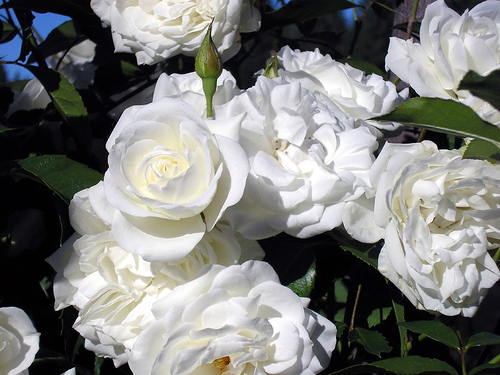

[0 0 1]


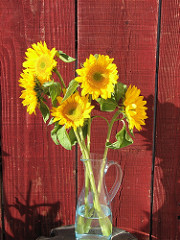

[1 0 0]


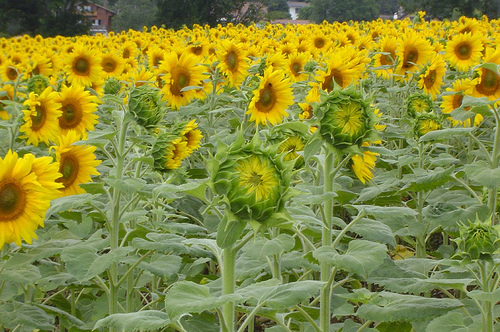

[1 0 0]


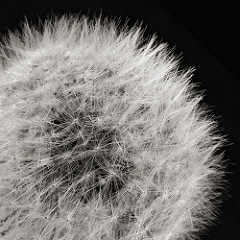

[0 1 0]


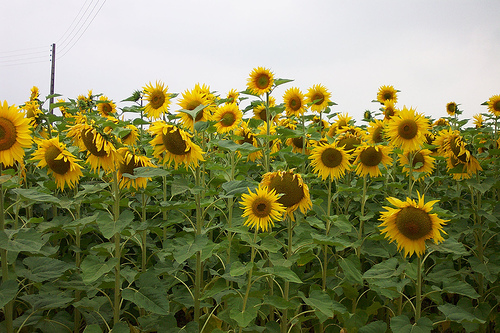

[1 0 0]


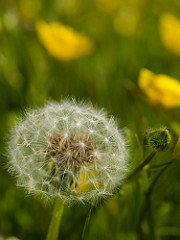

[0 1 0]


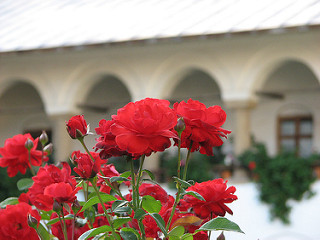

[0 0 1]


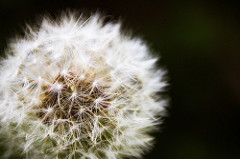

[0 1 0]


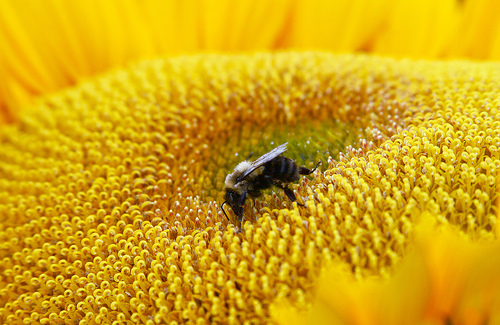

[1 0 0]


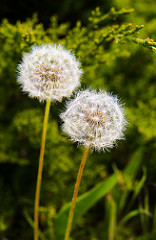

[0 1 0]


In [ ]:
#Data Visualization

for img_label, img_path in train_data[:10]:
  img = cv2.imread(img_path)
  cv2_imshow(img)
  print(img_label)

### 4. Buatlah kode python untuk mendefinisikan fungsi grayscale

In [ ]:
# Data Preprocessing (resize, grayscale, flatten)

img_size = (320, 240)
def preprocess(img):
  img_processed = cv2.resize(img, img_size)
  img_processed = cv2.cvtColor(img_processed, cv2.COLOR_BGR2GRAY)
  img_processed = img_processed.flatten()
  return img_processed

train_dataset = [(img_label, preprocess(cv2.imread(img_path))) for img_label, img_path in train_data]
test_dataset = [(img_label, preprocess(cv2.imread(img_path))) for img_label, img_path in test_data]

In [ ]:
# 5. Sigmoid Function
def sigmoid_funct(x):
  var_value = 1/(1 + np.exp(-x))
  return var_value

# 6. Weight initialize and bias
def initialize_wb(model):
  model.theta_input = np.random.normal(0, 2/input_layer_neuron, (input_layer_neuron, hidden_layer_neuron))
  model.bias_input = np.random.normal(0, 2/input_layer_neuron, hidden_layer_neuron)

  model.theta_output = np.random.normal(0, 2/hidden_layer_neuron, (hidden_layer_neuron, output_layer_neuron))
  model.bias_output = np.random.normal(0, 2/hidden_layer_neuron, output_layer_neuron)

# 7. Calculate error
def error_func(label, output):
  error_val = ((output - label)**2)/2
  return error_val

# 8. Feedforward
def feedforward_func(input_data, model):
  hidden_layer = sigmoid_funct(np.dot(input_data, model.theta_input) + model.bias_input)
  output_layer = sigmoid_funct(np.dot(hidden_layer, model.theta_output) + model.bias_output)
  return output_layer, hidden_layer

# 9. Backward
def backward_func(label, input_data, model, lr):
  output_layer, hidden_layer = feedforward_func(input_data, model)
  
  hidden_layer = hidden_layer.reshape((len(hidden_layer), 1))
  output_layer = output_layer.reshape((1, len(output_layer)))
  reshaped_inputdata = input_data.reshape((len(input_data), 1))
  
  output_error = error_func(label, output_layer)
  
  dhidden_output = (output_layer - label) * output_layer * (1 - output_layer)
  dthidden_output = np.dot(hidden_layer, dhidden_output)

  hidden_error = np.dot(model.theta_output, dhidden_output.T)
  dhidden_input = hidden_error * hidden_layer * (1 - hidden_layer) 
  dhidden_input = dhidden_input.reshape((1, len(dhidden_input)))
  dthidden_input = np.dot(reshaped_inputdata, dhidden_input)

  model.theta_output -= lr * dthidden_output / len(train_dataset)
  model.bias_output -= lr * dhidden_output[0] / len(train_dataset)
  model.theta_input -= lr * dthidden_input / len(train_dataset)
  model.bias_input -= lr * dhidden_input[0] / len(train_dataset)

  return np.sum(error_func(label, feedforward_func(input_data, model)[0]))

In [ ]:
# 10. Prediction
def prediction_funct(input_data, model):
  output, _ = feedforward_func(input_data, model)
  return np.argmax(output)

# 11. Accuracy
def calculateAccuracy(model):
  count = 0
  for label, data in test_dataset:
    if np.argmax(label) == prediction_funct(data, model):
      count += 1
  accuracy = count / len(test_dataset)
  return accuracy

# 12. Definisikan fungsi training (80% data) dan testing (20% data)
def training_model(model, epoch, lr):
  print("\n\nTraining model\n[Epoch =", epoch, "; Learning_rate =", lr ,"]")
  dataAccuracy = []
  dataError  = []
  log_string = ''
  for currentEpoch in range(epoch):
    totalError = 0
    for index, (label, data) in enumerate(train_dataset):
      cur_error = backward_func(label, data, model, lr)
      totalError += cur_error
      print('\b' * len(log_string), end='')
      log_string = f'\nEpoch: {currentEpoch + 1}/{epoch}, Data: {index}/{len(train_dataset)}'
      if len(dataError) > 0:
        log_string += f', Error: {dataError[-1]}'
      print(log_string, end='')
    dataError.append(totalError/len(train_dataset))
    dataAccuracy.append(calculateAccuracy(model))
  print("\nTraining finished")
  return dataError, dataAccuracy

#13. Visualisasikan error dan akurasi setiap epoch untuk 50 epoch, dan coba gunakan learning rate = 0,1 ; learning rate = 0,8
def visualization(dataError, dataAccuracy):
  plt.title("Errors")
  plt.plot(dataError, 'r-')
  plt.show()
  plt.title("Accuracy")
  plt.plot(dataAccuracy, 'b-')
  plt.show()



Training model
[Epoch = 50 ; Learning_rate = 0.1 ]

Epoch: 1/50, Data: 0/240
Epoch: 1/50, Data: 1/240
Epoch: 1/50, Data: 2/240
Epoch: 1/50, Data: 3/240

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Streaming output truncated to the last 5000 lines.
Epoch: 30/50, Data: 41/240, Error: 0.33317345035409696
Epoch: 30/50, Data: 42/240, Error: 0.33317345035409696
Epoch: 30/50, Data: 43/240, Error: 0.33317345035409696
Epoch: 30/50, Data: 44/240, Error: 0.33317345035409696
Epoch: 30/50, Data: 45/240, Error: 0.33317345035409696
Epoch: 30/50, Data: 46/240, Error: 0.33317345035409696
Epoch: 30/50, Data: 47/240, Error: 0.33317345035409696
Epoch: 30/50, Data: 48/240, Error: 0.33317345035409696
Epoch: 30/50, Data: 49/240, Error: 0.33317345035409696

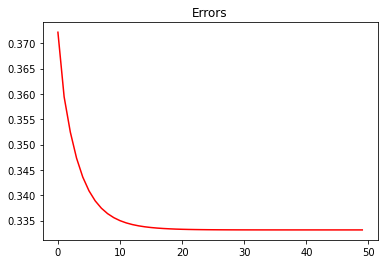

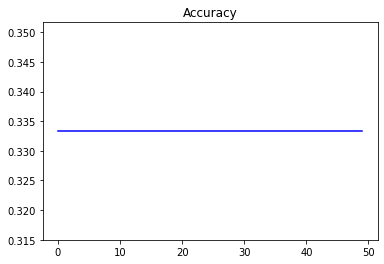

In [ ]:
# percobaan epoch=50 dan learning rate=0,1
epoch50_01 = MultilayerPerceptron()
initialize_wb(epoch50_01)
dataError50_01, dataAccuracy50_01 = training_model(epoch50_01, 50, 0.1)
visualization(dataError50_01, dataAccuracy50_01)



Training model
[Epoch = 50 ; Learning_rate = 0.8 ]

Epoch: 1/50, Data: 0/240
Epoch: 1/50, Data: 1/240
Epoch: 1/50, Data: 2/240
Epoch: 1/50, Data: 3/240

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Streaming output truncated to the last 5000 lines.
Epoch: 30/50, Data: 41/240, Error: 0.3321733459291739
Epoch: 30/50, Data: 42/240, Error: 0.3321733459291739
Epoch: 30/50, Data: 43/240, Error: 0.3321733459291739
Epoch: 30/50, Data: 44/240, Error: 0.3321733459291739
Epoch: 30/50, Data: 45/240, Error: 0.3321733459291739
Epoch: 30/50, Data: 46/240, Error: 0.3321733459291739
Epoch: 30/50, Data: 47/240, Error: 0.3321733459291739
Epoch: 30/50, Data: 48/240, Error: 0.3321733459291739
Epoch: 30/50, Data: 49/240, Error: 0.3321733459291739

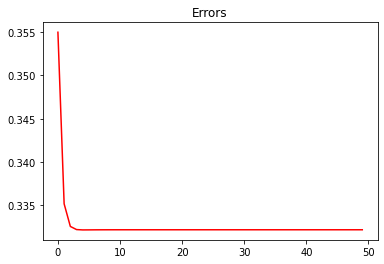

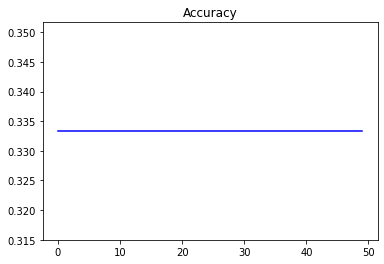

In [ ]:
# percobaan epoch=50 dan learning rate=0,8
epoch50_08 = MultilayerPerceptron()
initialize_wb(epoch50_08)
dataError50_08, dataAccuracy50_08 = training_model(epoch50_08, 50, 0.8)
visualization(dataError50_08, dataAccuracy50_08)